In [ ]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

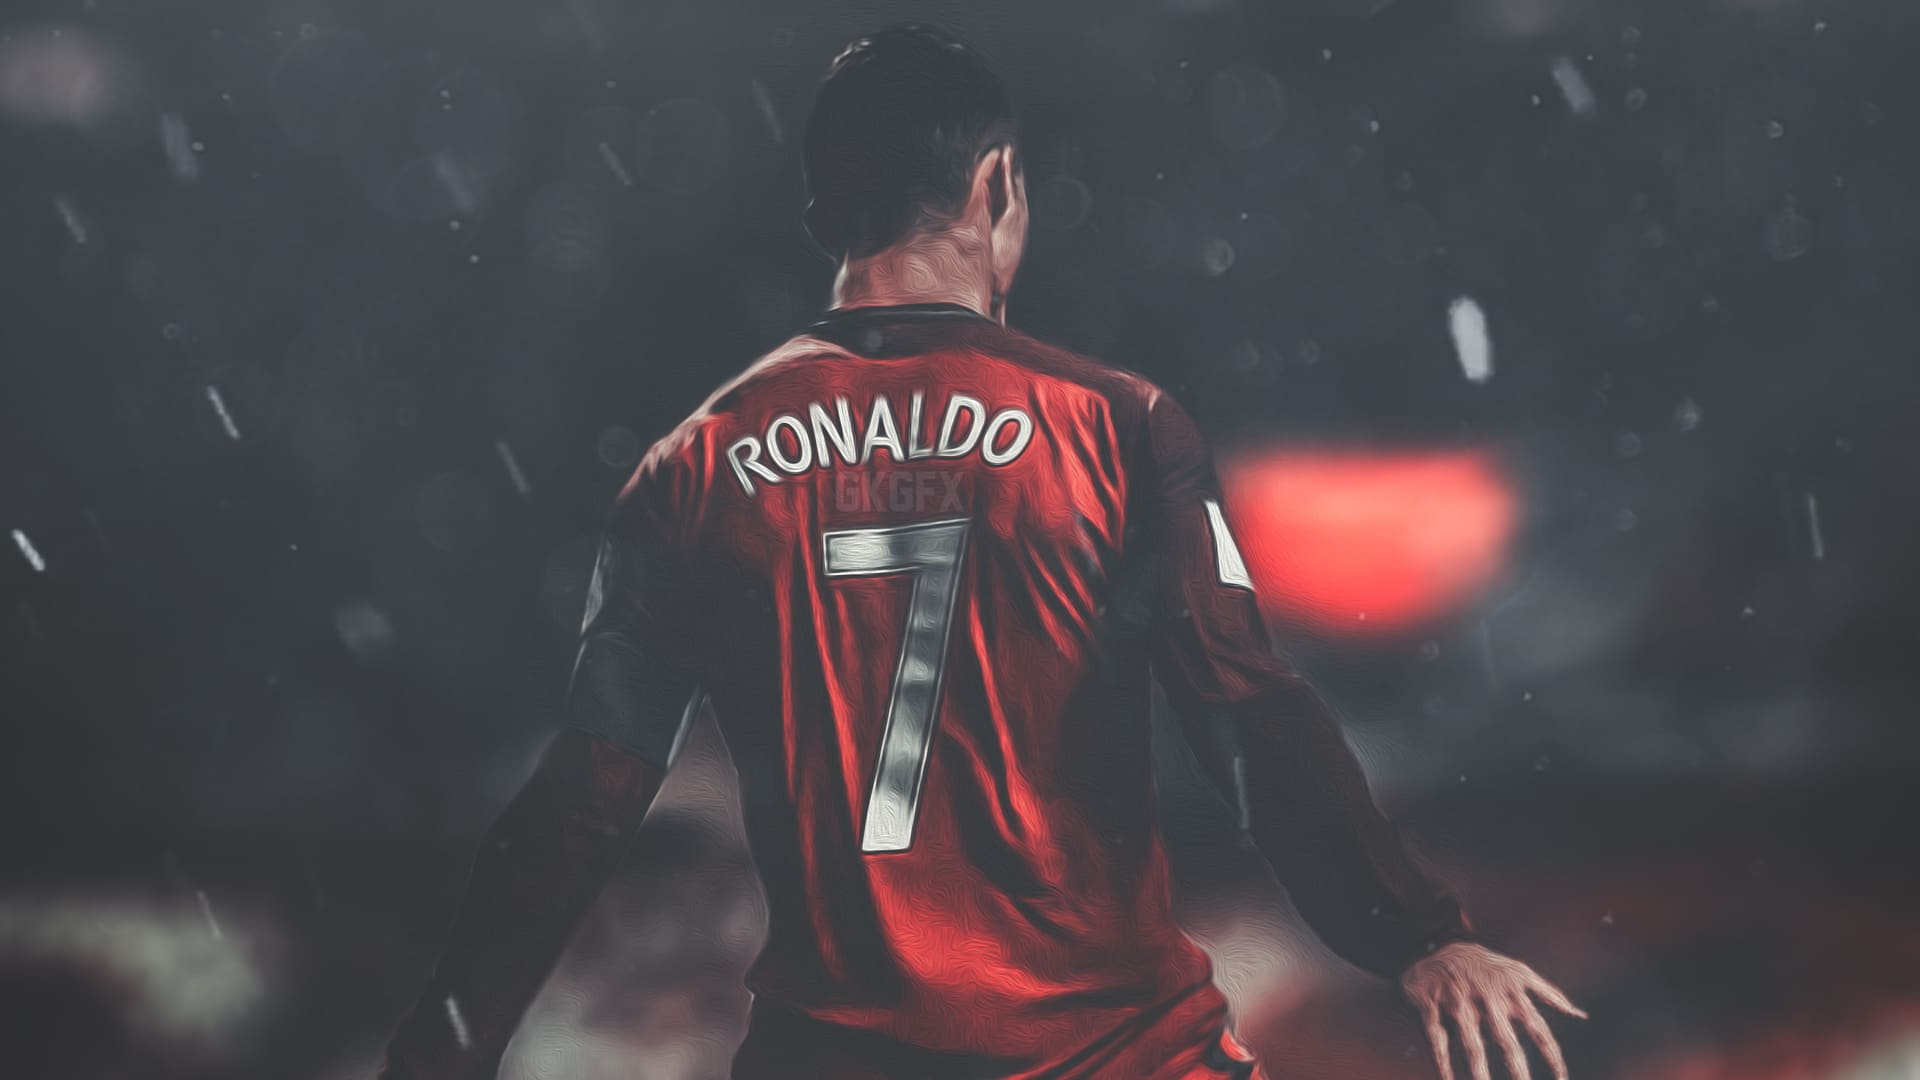

In [ ]:
image = cv2.imread("/ronaldo.jpg")
cv2_imshow(image)



In [ ]:
def add_padding(image,padding=100):
  return cv2.copyMakeBorder(image,padding,padding,padding,padding,cv2.BORDER_CONSTANT)


In [ ]:
#custom padding paraemters
padding = 200
padded_image = add_padding(image,padding)


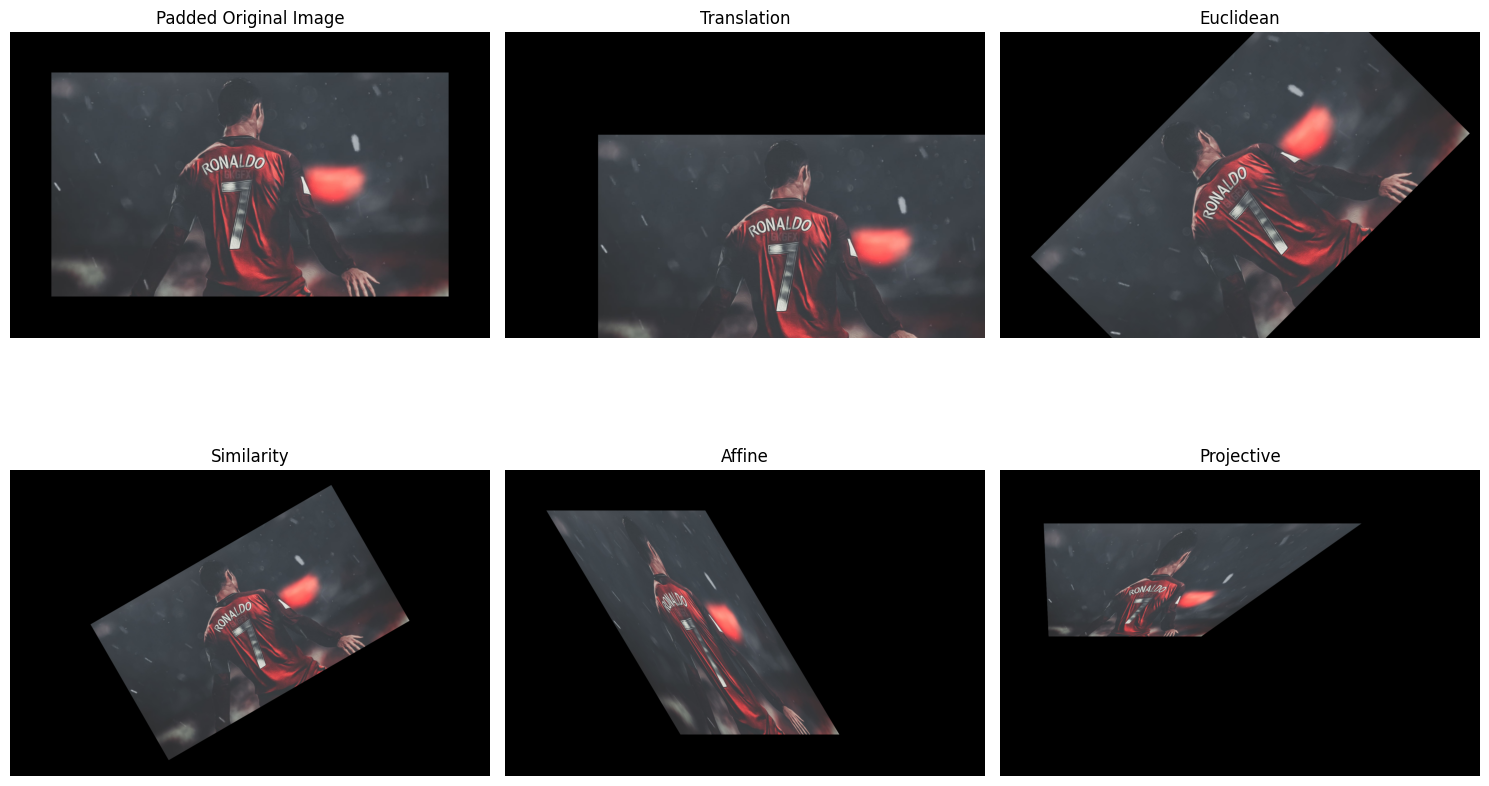

In [ ]:
# Adjust transformation functions to account for padding
def translate(image, tx, ty):
    rows, cols = image.shape[:2]
    T = np.float32([[1, 0, tx + padding], [0, 1, ty + padding]])
    return cv2.warpAffine(image, T, (cols, rows))

def euclidean(image, theta, tx, ty):
    rows, cols = image.shape[:2]
    center = (cols // 2, rows // 2)
    R = cv2.getRotationMatrix2D(center, theta, 1)
    R[:, 2] += [tx, ty]
    return cv2.warpAffine(image, R, (cols, rows))

def similarity(image, s, theta, tx, ty):
    rows, cols = image.shape[:2]
    center = (cols // 2, rows // 2)
    R = cv2.getRotationMatrix2D(center, theta, s)
    R[:, 2] += [tx, ty]
    return cv2.warpAffine(image, R, (cols, rows))

def affine(image, points1, points2):
    M = cv2.getAffineTransform(points1, points2)
    rows, cols = image.shape[:2]
    return cv2.warpAffine(image, M, (cols, rows))

def projective(image, points1, points2):
    rows, cols = image.shape[:2]
    H = cv2.getPerspectiveTransform(points1, points2)
    return cv2.warpPerspective(image, H, (cols, rows))

# Apply transformations on padded image
translated_image = translate(padded_image, 50, 100)
euclidean_image = euclidean(padded_image, 45, 50, 50)
similarity_image = similarity(padded_image, 0.7, 30, 0, 0)
affine_image = affine(padded_image, np.float32([[0,0], [50,100], [100,100]]), np.float32([[0,0], [80,100], [100,100]]))
projective_image = projective(padded_image, np.float32([[0,0], [512,0], [0,512], [512,512]]), np.float32([[0,0], [512,0], [100,512], [412,512]]))

# Visualization
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()
for ax in axs:
    ax.axis('off')

axs[0].imshow(cv2.cvtColor(padded_image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Padded Original Image')

axs[1].imshow(cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB))
axs[1].set_title('Translation')

axs[2].imshow(cv2.cvtColor(euclidean_image, cv2.COLOR_BGR2RGB))
axs[2].set_title('Euclidean')

axs[3].imshow(cv2.cvtColor(similarity_image, cv2.COLOR_BGR2RGB))
axs[3].set_title('Similarity')

axs[4].imshow(cv2.cvtColor(affine_image, cv2.COLOR_BGR2RGB))
axs[4].set_title('Affine')

axs[5].imshow(cv2.cvtColor(projective_image, cv2.COLOR_BGR2RGB))
axs[5].set_title('Projective')

plt.tight_layout()
plt.show()